In [38]:
# import library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# import the data 
heart_data = pd.read_csv("/home/student/Documents/AIMS/COOP_tasks/data_science_projects/Heart_Attack_Risk_Assessment/data/updated_version.csv")

## Description of our dataset:

This dataset contains 1,000 patient records generated for health risk assessment. <br>
It includes biometric health indicators commonly used in cardiovascular and general health research. <br>
Each record captures age, cholesterol levels, blood pressure, smoking habits, <br>
diabetes status, and heart attack history—key factors influencing cardiovascular diseases.

On this dataset we are intempt to run:
* Exploratory Data Analysis (EDA)
* Statistical analysis
* Machine learning classification tasks


These are the columns:
* age: Patient's age (years)
* sex: Biological sex (0 = Female, 1 = Male)
* total_cholesterol: Total cholesterol level (mg/dL)
* ldl: Low-Density Lipoprotein (LDL) cholesterol (mg/dL)
* hdl: High-Density Lipoprotein (HDL) cholesterol (mg/dL)
* systolic_bp: Systolic blood pressure (mmHg)
* diastolic_bp: Diastolic blood pressure (mmHg)
* smoking: Smoking status (0 = Non-Smoker, 1 = Smoker)
* diabetes: Diabetes status (0 = No, 1 = Yes)
* heart_attack: History of heart attack (0 = No, 1 = Yes)

📌 Note: This dataset is synthetically generated and does not represent real patients. <br> 
It is meant for research and educational purposes only. 

In [ ]:
# look at the shape of our dataset 
print(heart_data.shape)

(1000, 10)


In [4]:
# take a look of some rows in our dataset
heart_data.head(10)

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,0
5,39,1,236.033455,153.880809,31.208614,121.857396,79.589069,0,0,0
6,65,0,174.615665,114.029407,55.692586,135.605050,85.529955,0,0,0
7,33,0,242.919402,147.951375,54.439475,123.511557,77.331714,0,0,0
8,49,0,95.804359,83.304875,60.758929,111.697488,77.630529,1,0,0
9,55,0,181.360943,106.011783,50.576747,129.576418,87.588781,0,0,0


## Exploratory Data Analysis (EDA)

In [12]:
# We check for missng and duplicated observations
number_of_missing = heart_data.isnull().sum()
number_of_duplicated = heart_data.duplicated().sum()

print(number_of_missing,"\n ")
print(number_of_duplicated,"duplicated observations")

age                  0
sex                  0
total_cholesterol    0
ldl                  0
hdl                  0
systolic_bp          0
diastolic_bp         0
smoking              0
diabetes             0
heart_attack         0
dtype: int64 
 
0 duplicated observations


In [19]:
# summary of continouos variable in our dataset
continuous_variable = heart_data[["age","total_cholesterol","ldl","hdl","systolic_bp","diastolic_bp"]]
continuous_variable.describe()

,age,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.886000,201.087486,130.047807,49.811244,120.312687,80.231248
std,14.209466,40.042655,30.041659,10.247178,15.507493,10.235917
min,18.000000,84.165932,36.259745,20.600644,74.433950,49.296305
25%,40.000000,174.707208,111.963197,42.622102,110.062952,73.277119
50%,49.000000,201.191547,130.678540,49.682809,120.042175,79.912592
75%,59.000000,226.251708,149.732446,56.703598,130.911804,87.084443
max,94.000000,354.660015,231.376631,82.319810,164.080967,113.848127


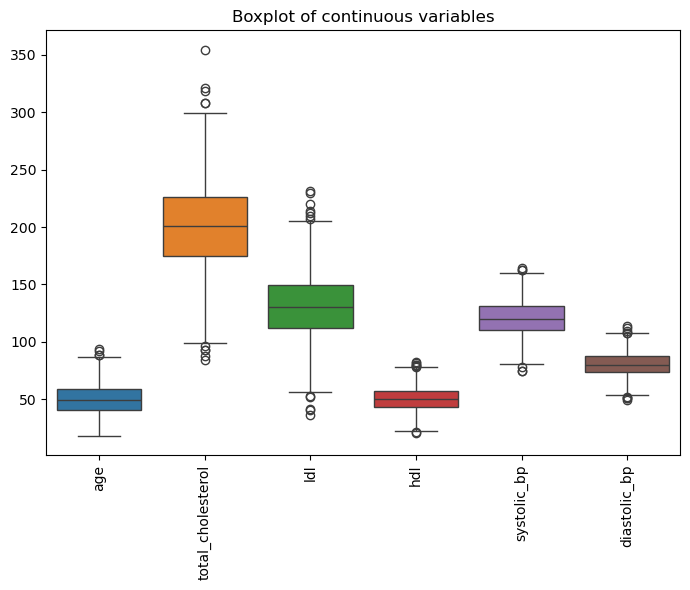

In [42]:
# boxplot of the continuos variables
plt.figure(figsize=(7, 6))
sns.boxplot(data=continuous_variable)

# Set labels and title
plt.title('Boxplot of continuous variables')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

## Insight and interpretation:

Here we can all the box are center arround the mean which suggest us that they all follow a symetric distribution.<br>
they are on each case some extreme values which are far from the oder values we should pay attention to those observations<br>
have a direct effect on the incresing of the risk to get a hearth attack.    

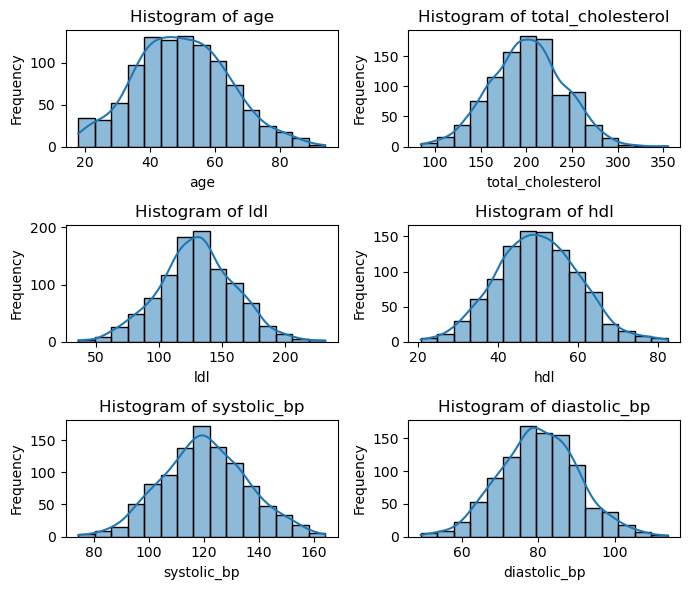

In [37]:
# What about the distribution of the variable in our dataset
# Histogramme of the continuous variables.
plt.figure(figsize=(7, 6))
# Loop through each continuous variable to plot their histogram
for i, col in enumerate(continuous_variable.columns, 1):
    plt.subplot(3, 2, i)  # Adjust the number of rows and columns for subplots
    sns.histplot(continuous_variable[col], bins=15, kde=True)  # Plot histogram with KDE
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

Here we can see that the suggestions give by the box plot are confirmed since oll these variables are following normal distribution.

In [41]:
# Scaling the variable to be able to plot their scater plot
scaler = StandardScaler()
scaled_data = scaler.fit_transform(continuous_variable)
# Convert back to a DataFrame with the same column names
scaled_df = pd.DataFrame(scaled_data, columns=continuous_variable.columns)
scaled_df.describe()

,age,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.025047e-16,-2.842171e-16,-4.316547e-16,6.217249e-17,-7.460699e-17,5.710987e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.245120e+00,-2.921386e+00,-3.123496e+00,-2.852026e+00,-2.959969e+00,-3.023708e+00
25%,-6.960815e-01,-6.591341e-01,-6.022856e-01,-7.019240e-01,-6.612845e-01,-6.797250e-01
50%,-6.238400e-02,2.600065e-03,2.100577e-02,-1.253994e-02,-1.745272e-02,-3.114672e-02
75%,6.417244e-01,6.287499e-01,6.555726e-01,6.729465e-01,6.838256e-01,6.698593e-01
max,3.106104e+00,3.837143e+00,3.374631e+00,3.174028e+00,2.823808e+00,3.285851e+00


In [45]:
# Scater plot matrix of our variables


In [ ]:
# Correlation matrix of the dataset

## Statistical analysis

In [ ]:
# What is the effect of smoking on heart_attack

In [ ]:
# Does the level of cholesterol and the age increase the risk of heart attack ?

In [ ]:
# Does it have more heart attack in a given category of sexe ?

In [ ]:
# how change the risk of heart attack with the ldl: Low-Density Lipoprotein, hdl: High-Density Lipoprotein

## Build classification machine learning models

In [ ]:
# we train first a full linear classification model.

In [ ]:
# interpretation of it's coefficient and variance analysis.

In [ ]:
# we perfom feature importance to see if we can build small model which perform better

In [ ]:
# build a model with the important features

In [ ]:
# interpratation of it's coefficient and variance analysis

In [ ]:
# select feature by step-wise selection and see if the selected features will be the same selected when we where runing the feature importance

In [ ]:
# we build different models using differents algorithm 

In [ ]:
# we compare the different obtained models
